# BlackBelt Consulting

## 1. Benson Project

### 1.1 Data Collection

In [1]:
import pandas as pd
import datetime

In [16]:
numdays = 21  # just setting the number of days we want to take back 1 week from 06-29
# we can increase it later, this is just so we can start with a "small" data set

In [17]:
date_time_str = '2019-06-22 08:15:27.243860'  # penultimate date of the range in the MTA website
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')  
# transforming it to a date_time object
date_time_obj

datetime.datetime(2019, 6, 22, 8, 15, 27, 243860)

In [18]:
date_list = [date_time_obj - datetime.timedelta(days=x) for x in range(0, numdays, 7)]
# creating a list of dates that starts on the penultimate date and goes back the numdays we've set 
# (jumping 7 days each time)
date_list

[datetime.datetime(2019, 6, 22, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 15, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 8, 8, 15, 27, 243860)]

In [19]:
# transforming the dates into strings and putting in a list:

url_dates = []

for i in date_list:
    year = str(i.year).replace("20", "")
    day = str(i.day)
    if i.day < 10:
        day = "0" + day
    month = str(i.month)
    if i.month < 10:
        month = "0" + month
    date_str = year + month + day
    url_dates.append(date_str)

url_dates

['190622', '190615', '190608']

In [20]:
# starting the dataframe with the last available date, which is june 29, 19:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [21]:
# concatenating each new date to the original dataframe:
for url in url_dates:
    df2 = pd.read_csv(
        "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt".format(url))
    df = pd.concat([df, df2], ignore_index=True)

In [23]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823385 entries, 0 to 823384
Data columns (total 11 columns):
C/A                                                                     823385 non-null object
UNIT                                                                    823385 non-null object
SCP                                                                     823385 non-null object
STATION                                                                 823385 non-null object
LINENAME                                                                823385 non-null object
DIVISION                                                                823385 non-null object
DATE                                                                    823385 non-null object
TIME                                                                    823385 non-null object
DESC                                                                    823385 non-null object
ENTRIES                           

In [25]:
df.columns = [column.strip() for column in df.columns]

In [26]:
df["DATE_TIME"] = pd.to_datetime(df["DATE"] + " " + df["TIME"])

In [29]:
# Data from - Jun 2019
df.DATE.value_counts().sort_index()

06/01/2019    29066
06/02/2019    28968
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
06/08/2019    29030
06/09/2019    29133
06/10/2019    29351
06/11/2019    29113
06/12/2019    30023
06/13/2019    29276
06/14/2019    29008
06/15/2019    29605
06/16/2019    29322
06/17/2019    29421
06/18/2019    29599
06/19/2019    29614
06/20/2019    29556
06/21/2019    30360
06/22/2019    29217
06/23/2019    29170
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, dtype: int64

In [33]:
df["TURNSTILE_ID"] = df["C/A"] + " " + df["UNIT"] + " " + df["SCP"] + " " + df["STATION"]

In [34]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00,A002 R051 02-00-00 59 ST


In [46]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["TURNSTILE_ID", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(30)

,TURNSTILE_ID,DATE_TIME,ENTRIES
583293,R174 R034 00-00-03 125 ST,2019-06-08 00:00:00,2
194099,N045 R187 01-00-02 81 ST-MUSEUM,2019-06-01 17:00:00,2
193942,N045 R187 01-00-01 81 ST-MUSEUM,2019-06-02 17:00:00,2
194324,N045 R187 01-06-00 81 ST-MUSEUM,2019-06-11 21:00:00,2
660217,R249 R179 01-05-00 86 ST,2019-06-27 00:00:00,2
679477,R290 R161 00-00-00 KINGSBRIDGE RD,2019-06-07 05:00:00,2
660221,R249 R179 01-05-00 86 ST,2019-06-27 04:00:00,2
583125,R174 R034 00-00-02 125 ST,2019-06-08 00:00:00,2
193937,N045 R187 01-00-01 81 ST-MUSEUM,2019-06-01 17:00:00,2
194104,N045 R187 01-00-02 81 ST-MUSEUM,2019-06-02 17:00:00,2


In [47]:
# On some days, we seem to have two entries for same time.  Let's take a look
mask = ((df["TURNSTILE_ID"] == "R174 R034 00-00-03 125 ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 8).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
558895,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,00:00:00,REGULAR,3828801,2853462,2019-06-08 00:00:00,R174 R034 00-00-03 125 ST
558896,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,00:00:00,RECOVR AUD,3828804,2853463,2019-06-08 00:00:00,R174 R034 00-00-03 125 ST
558897,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,08:00:00,REGULAR,3828931,2853610,2019-06-08 08:00:00,R174 R034 00-00-03 125 ST
558898,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,12:00:00,REGULAR,3829164,2853787,2019-06-08 12:00:00,R174 R034 00-00-03 125 ST
558899,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,16:00:00,REGULAR,3829514,2854060,2019-06-08 16:00:00,R174 R034 00-00-03 125 ST
558900,R174,R034,00-00-03,125 ST,1,IRT,06/08/2019,20:00:00,REGULAR,3829854,2854357,2019-06-08 20:00:00,R174 R034 00-00-03 125 ST


In [48]:
# On some days, we seem to have two entries for same time.  Let's take a look
mask = ((df["TURNSTILE_ID"] == "N045 R187 01-00-02 81 ST-MUSEUM") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 1).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
666700,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,01:00:00,REGULAR,4323386,989690,2019-06-01 01:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666701,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,05:00:00,REGULAR,4323388,989692,2019-06-01 05:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666702,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,09:00:00,REGULAR,4323394,989696,2019-06-01 09:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666703,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,13:00:00,REGULAR,4323510,989797,2019-06-01 13:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666704,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,4324002,989878,2019-06-01 17:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666705,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,4323998,989878,2019-06-01 17:00:00,N045 R187 01-00-02 81 ST-MUSEUM
666706,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,21:00:00,REGULAR,4324268,989897,2019-06-01 21:00:00,N045 R187 01-00-02 81 ST-MUSEUM


In [49]:
# Looking over more examples, these duplicates don't seem to show significant differences. 
# Therefore, we will get rid of the duplicate entries:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [50]:
# No problems anymore:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-06-01 00:00:00,1
548916,R139,R031,04-00-01,34 ST-PENN STA,2019-06-28 12:00:00,1
548906,R139,R031,04-00-01,34 ST-PENN STA,2019-06-26 20:00:00,1
548907,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 00:00:00,1
548908,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 04:00:00,1
548909,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 08:00:00,1
548910,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 12:00:00,1
548911,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 16:00:00,1
548912,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 20:00:00,1
548913,R139,R031,04-00-01,34 ST-PENN STA,2019-06-28 00:00:00,1


For our data we are focusing only in the entries since we believe this is a better approach to gauge the number of people focusing on the ads.

In [51]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [68]:
df.reset_index(drop=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,5554,2019-06-28 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,5554,2019-06-28 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,5554,2019-06-28 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,5554,2019-06-28 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,5554,2019-06-28 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
5,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,01:00:00,5554,2019-06-28 01:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
6,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,21:00:00,5554,2019-06-27 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
7,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,17:00:00,5554,2019-06-27 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
8,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,13:00:00,5554,2019-06-27 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
9,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,09:00:00,5554,2019-06-27 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT


In [70]:
# There seems to be a problem with 23rd street (and others) because different stations are named the same way:
df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).count()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
LINENAME,,,,,,,,,,
1,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184
6,4277,4277,4277,4277,4277,4277,4277,4277,4277,4277
CE,1878,1878,1878,1878,1878,1878,1878,1878,1878,1878
FM,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724
NRW,1769,1769,1769,1769,1769,1769,1769,1769,1769,1769


In [71]:
# Let's create a new column that concatenates the station and the lines to differenciate them:
df["STATION_LINE"] = df["STATION"] + " " + df["LINENAME"]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID,STATION_LINE
205962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,5554,2019-06-28 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,5554,2019-06-28 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,5554,2019-06-28 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,5554,2019-06-28 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R
205958,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,5554,2019-06-28 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R


In [94]:
turnstiles_daily = (df
                        .groupby(["C/A", "UNIT", "SCP", "STATION","TURNSTILE_ID", "LINENAME", "DATE"],as_index=False)
                        .ENTRIES.max())

In [95]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,TURNSTILE_ID,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/01/2019,7080817
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/02/2019,7081567
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/03/2019,7082949
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/04/2019,7084565
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/05/2019,7086109
5,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/06/2019,7087657
6,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/07/2019,7089268
7,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/08/2019,7090115
8,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/09/2019,7090874
9,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/10/2019,7092269


In [96]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))  

In [97]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,TURNSTILE_ID,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/01/2019,7080817,NaN,NaN
1,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/02/2019,7081567,06/01/2019,7080817.0
2,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/03/2019,7082949,06/02/2019,7081567.0
3,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/04/2019,7084565,06/03/2019,7082949.0
4,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/05/2019,7086109,06/04/2019,7084565.0
5,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/06/2019,7087657,06/05/2019,7086109.0
6,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/07/2019,7089268,06/06/2019,7087657.0
7,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/08/2019,7090115,06/07/2019,7089268.0
8,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/09/2019,7090874,06/08/2019,7090115.0
9,A002,R051,02-00-00,59 ST,A002 R051 02-00-00 59 ST,NQR456W,06/10/2019,7092269,06/09/2019,7090874.0


In [98]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [99]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

4407 3125272.0
1376283 8703.0
2801 4317416.0
1790 13967417.0
221 7246254.0
4050923 5903657.0
7246468 4050451.0
524600 5853002.0
595060 57022793.0
5573286 104608160.0
459396 4526857.0
458752 117849318.0
228 1393341.0
286 3466273.0
1828704206 9687851.0
342 4086581.0
1834 2588198.0
2624 4676995.0
1963 621485465.0
710 1253355.0
1875 1652257.0
3642 1524744.0
1447 1048102.0
2398 1252507.0
1773 1573067.0
2749 3127400.0
4093 1947791.0
4105 1216440.0
1877 1310209.0
3488 1063837.0
3493 2409981.0
3450 1093598.0
2957 1461430.0
4608 1055224.0
3003 2725550.0
4220 2041814.0
1 1910177.0
1185 1003916.0
1152 3210019.0
5350 1395727.0
4407 2286257.0
4435 1696384.0
3984 1058923.0
0 1078800.0
4661 2793550.0
659 1327071.0
1338 1427069.0
9513 1560406.0
2966 2029275.0
452993419 1830432.0
881626829 1942743949.0
88840996 1258666495.0
704681758 2758310.0
868286442 101740072.0
360 1488298.0


In [107]:
turnstiles_daily["DAILY_ENTRIES"].sort_values(ascending=False)

79921     974322.0
42108     966219.0
78698     965785.0
77582     935445.0
81877     902748.0
76824     883173.0
79735     866397.0
42109     851681.0
79595     847588.0
77498     794981.0
81753     731850.0
76020     728692.0
79819     618465.0
77943     605457.0
20143     595060.0
77915     563375.0
78894     556482.0
84198     555330.0
82122     540700.0
82652     534728.0
78782     532919.0
78390     525927.0
17093     524600.0
42081     496176.0
4508      489304.0
36822     459396.0
37871     458752.0
75737     449761.0
76880     431993.0
78083     430706.0
            ...   
29036          0.0
29038          0.0
29045          0.0
29047          0.0
29051          0.0
29053          0.0
29054          0.0
29056          0.0
28977          0.0
28975          0.0
28955          0.0
28974          0.0
28957          0.0
28958          0.0
28959          0.0
28960          0.0
28961          0.0
28962          0.0
28963          0.0
28964          0.0
28965          0.0
28966       

In [123]:
turnstiles_daily[turnstiles_daily["STATION"] == "JOURNAL SQUARE"]

,C/A,UNIT,SCP,STATION,TURNSTILE_ID,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
76706,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/02/2019,82605,06/01/2019,82412.0,193.0
76707,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/03/2019,83041,06/02/2019,82605.0,436.0
76708,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/04/2019,83436,06/03/2019,83041.0,395.0
76709,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/05/2019,83881,06/04/2019,83436.0,445.0
76710,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/06/2019,84312,06/05/2019,83881.0,431.0
76711,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/07/2019,84346,06/06/2019,84312.0,34.0
76712,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/08/2019,341,06/07/2019,84346.0,84005.0
76713,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/09/2019,479,06/08/2019,341.0,138.0
76714,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/10/2019,924,06/09/2019,479.0,445.0
76715,PTH03,R552,00-00-00,JOURNAL SQUARE,PTH03 R552 00-00-00 JOURNAL SQUARE,1,06/11/2019,1404,06/10/2019,924.0,480.0


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # automatic seaborn settings

%matplotlib inline

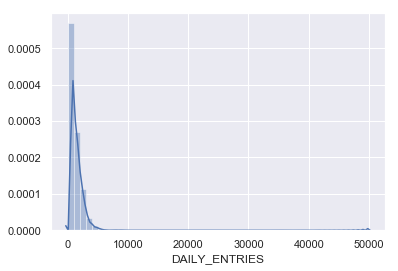

In [109]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000]);

In [122]:
# first get daily entries by station
stations_daily = \
    (turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())  

stations_daily[stations_daily["STATION"] == "JOURNAL SQUARE"]

,STATION,DATE,DAILY_ENTRIES
6947,JOURNAL SQUARE,06/02/2019,11134.0
6948,JOURNAL SQUARE,06/03/2019,61927.0
6949,JOURNAL SQUARE,06/04/2019,26989.0
6950,JOURNAL SQUARE,06/05/2019,27881.0
6951,JOURNAL SQUARE,06/06/2019,28089.0
6952,JOURNAL SQUARE,06/07/2019,10101.0
6953,JOURNAL SQUARE,06/08/2019,4444591.0
6954,JOURNAL SQUARE,06/09/2019,11585.0
6955,JOURNAL SQUARE,06/10/2019,25253.0
6956,JOURNAL SQUARE,06/11/2019,27886.0


In [120]:
# (sum across all days is a reasonable way to define this)
stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False))

stations[stations["STATION"] == "JOURNAL SQUARE"]

,STATION,DAILY_ENTRIES
260,JOURNAL SQUARE,5088833.0


In [113]:
sns.boxplot(turnstiles_daily["DAILY ENTRIES"], turnstiles_daily ["STATION"]);

KeyError: 'DAILY ENTRIES'